# 1. Modeling of carbon cycle

In [36]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

# 读取数据集  
fossil_fuel_emissions = pd.read_csv('E:/ESE5023/Global Fossil-Fuel CO2 Emissions.1751_2014.csv')  
mauna_loa_data = pd.read_csv('E:/ESE5023/Mauna Loa CO2 annual mean data.csv')  
ice_core_data = pd.read_excel('E:/ESE5023/Historical CO2 Records from the Law Dome DE08, DE08-2, and DSS Ice Cores.xlsx')  

# 查看每个数据集的前几行以了解其结构  
print(fossil_fuel_emissions.head())  
print(mauna_loa_data.head())  
print(ice_core_data.head())

observed_years = mauna_loa_data.loc[(mauna_loa_data['year'] >= 1986) & (mauna_loa_data['year'] <= 2004), 'year']  
observed_co2 = mauna_loa_data.loc[(mauna_loa_data['year'] >= 1986) & (mauna_loa_data['year'] <= 2004), 'mean']  

   Year  \
0  1751   
1  1752   
2  1753   
3  1754   
4  1755   

   Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)  \
0                                                  3                                                      
1                                                  3                                                      
2                                                  3                                                      
3                                                  3                                                      
4                                                  3                                                      

   Carbon emissions from gas fuel consumption  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0

In [210]:
# 常数  
k12 = 105/740  
k21 = 102/900    
gamma = 0

# 时间参数  
years = np.arange(1987, 2005)  
N1 = 347  # 箱1的初始碳浓度（ppm）  
N2 = 900/2.13    # 箱2的初始碳浓度（ppm）  

# 存储结果  
N1_results = []  
N2_results = []  

# 模拟  
for year in years:  
    gamma = fossil_fuel_emissions.loc[fossil_fuel_emissions['Year'] == year,   
                                       'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].values[0] 
    # 碳流速率变化  
    dN1_dt = -k12 * N1 + k21 * N2 + gamma/(1000*2.13)
    dN2_dt = k12 * N1 - k21 * N2
    
    # 更新浓度  
    N1 += dN1_dt  
    N2 += dN2_dt  
    
    N1_results.append(N1)  
    N2_results.append(N2)  

# 将结果转换为DataFrame以便于处理  
results_df = pd.DataFrame({'Year': years, 'N1 (ppm)': N1_results, 'N2 (ppm)': N2_results})  
print(results_df) 

    Year    N1 (ppm)    N2 (ppm)
0   1987  348.338631  423.884374
1   1988  349.739287  425.270572
2   1989  351.159337  426.698410
3   1990  352.543470  428.165919
4   1991  353.929449  429.663508
5   1992  355.258449  431.188030
6   1993  356.567897  432.728347
7   1994  357.914941  434.279894
8   1995  359.308195  435.846734
9   1996  360.748469  437.433691
10  1997  362.214939  439.045155
11  1998  363.665351  440.682067
12  1999  365.088435  442.339264
13  2000  366.578163  444.010570
14  2001  368.121042  445.703841
15  2002  369.684321  447.424130
16  2003  371.400092  449.171270
17  2004  373.242719  450.963854


In [212]:
# 重置初始条件  
N1 = 347  
N2 = 900/2.13 

# 存储结果  
N1_buffered_results = []  
N2_buffered_results = []  

# 带缓冲效应的模拟  
for year in years: 
    gamma = fossil_fuel_emissions.loc[fossil_fuel_emissions['Year'] == year,   
                                       'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].values[0] 
    xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1 ** 2  # 缓冲效应系数  
    N2_eq = 821/2.13  # 箱2中的平衡浓度  
    dN1_dt = -k12 * N1 + k21 * (N2_eq + xi * (N2 - N2_eq)) + gamma/(1000*2.13)  
    dN2_dt = k12 * N1 - k21 * (N2_eq + xi * (N2 - N2_eq))  

    # 更新浓度  
    N1 += dN1_dt  
    N2 += dN2_dt  

    N1_buffered_results.append(N1)  
    N2_buffered_results.append(N2)  

# 将结果转换为DataFrame  
results_buffered_df = pd.DataFrame({'Year': years, 'N1 (ppm)': N1_buffered_results, 'N2 (ppm)': N2_buffered_results})  
print(results_buffered_df)

    Year    N1 (ppm)    N2 (ppm)
0   1987  385.864715  386.358290
1   1988  378.680234  396.329626
2   1989  384.401426  393.456320
3   1990  385.992855  394.716535
4   1991  388.929388  394.663570
5   1992  391.408347  395.038132
6   1993  394.030319  395.265925
7   1994  396.655325  395.539511
8   1995  399.353938  395.800992
9   1996  402.110740  396.071420
10  1997  404.915988  396.344106
11  1998  407.728181  396.619237
12  1999  410.536031  396.891669
13  2000  413.427447  397.161286
14  2001  416.386237  397.438646
15  2002  419.389451  397.719000
16  2003  422.570696  398.000666
17  2004  425.906880  398.299693


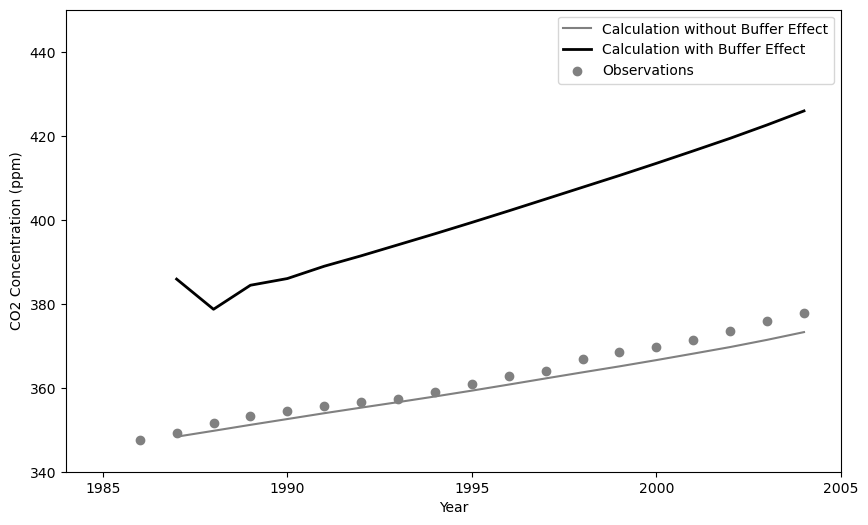

In [213]:
plt.figure(figsize=(10, 6))  
plt.plot(results_df['Year'], results_df['N1 (ppm)'], label='Calculation without Buffer Effect', color='grey')  
plt.plot(results_buffered_df['Year'], results_buffered_df['N1 (ppm)'], label='Calculation with Buffer Effect', color='black', linewidth=2)  
plt.scatter(observed_years, observed_co2, color='gray', label='Observations', zorder=5)  # 观测值

plt.xticks(np.arange(1985, 2006, 5))
plt.xlabel('Year')  
plt.ylabel('CO2 Concentration (ppm)')  
plt.legend()  
plt.xlim(1984, 2005)  
plt.ylim(340,450)
plt.show()